In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
beer_df = pd.read_csv("/home/maksim/Загрузки/beer_reviews.csv")

In [3]:
beer_df.head()

brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stout            3.0           3.0   
3                 German Pilsener            2.5           3.0   
4  American Double / Imperial IPA            4.0           4.5   

                beer_name  beer_abv  beer_beerid  
0            Sausa Weizen       5.0        47986  
1                Red Moon       6.2        48213  
2  Black Horse Black Beer       6.5        48215  
3              Sausa Pils       5.0        47969  
4           Cauldron DIPA       7.7        64883

In [4]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

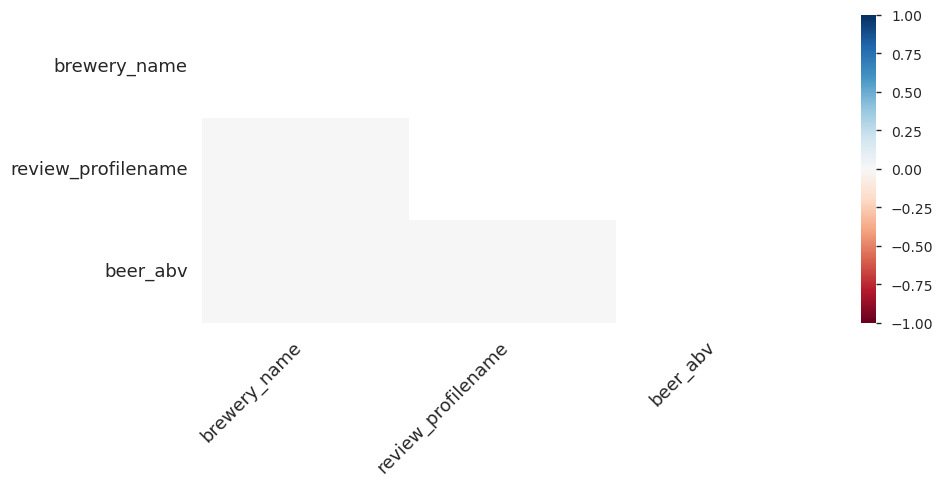

In [15]:
from ydata_profiling import ProfileReport
profile = ProfileReport(beer_df, title='Data profile')
profile

##### Which brewery produces the strongest beers by abv ?

In [5]:
brewery_abv = beer_df.groupby('brewery_name')['beer_abv'].mean().sort_values(ascending=False)

# Brewery with the highest average ABV
strongest_brewery = brewery_abv.idxmax()
strongest_brewery_abv = brewery_abv.max()

print(f"The brewery with the strongest beers by ABV is {strongest_brewery} with an average ABV of {strongest_brewery_abv:.2f}%.")


The brewery with the strongest beers by ABV is Schorschbräu with an average ABV of 19.23%.


In [7]:
# Find the row with the maximum ABV
max_abv_row = beer_df.loc[beer_df['beer_abv'].idxmax()]

# Extract the brewery name and the corresponding ABV
strongest_brewery = max_abv_row['brewery_name']
strongest_beer = max_abv_row['beer_name']
strongest_abv = max_abv_row['beer_abv']

print(f"The strongest beer by ABV is '{strongest_beer}' brewed by {strongest_brewery} with an ABV of {strongest_abv}%.")


The strongest beer by ABV is 'Schorschbräu Schorschbock 57%' brewed by Schorschbräu with an ABV of 57.7%.


##### If you had to pick 3 beers to recommend to someone, how would you approach the problem ?

Define Criteria for Recommendation:

- Overall Rating: Prioritize beers with high overall ratings.
- Aroma, Taste, Appearance, Palate: Consider beers that excel in specific aspects like aroma and taste, which are important to many beer enthusiasts.
- Beer Style: Ensure diversity by selecting beers from different styles to cater to varying preferences.
- Popularity: Consider beers with a high number of reviews to ensure that the ratings are based on a large sample size.
- ABV Preference: Depending on the user's preference, you might want to include beers with varying ABV levels (e.g., light, moderate, and strong).


- High Overall Ratings: Filter beers with an overall rating above a certain threshold (e.g., 4.0 or higher or avg).
- Top Scores in Aroma, Taste, etc.: Identify beers that also score highly in specific categories like aroma and taste.
- Popularity Consideration: Focus on beers with a significant number of reviews to ensure the ratings are reliable.

In [14]:
# Filter beers with a high overall rating (e.g., 4.0 or higher)
highly_rated_beers = beer_df[beer_df['review_overall'] >= 4.0]

# Focus on beers with high scores in aroma, taste, and appearance
top_beers = highly_rated_beers[
    (highly_rated_beers['review_aroma'] >= 4.0) &
    (highly_rated_beers['review_taste'] >= 4.0) &
    (highly_rated_beers['review_appearance'] >= 4.0)
]

# Ensure the beers selected have a significant number of reviews (e.g., more than 100 reviews)
popular_beers = top_beers.groupby('beer_name').filter(lambda x: len(x) > 100)

# Choose 3 beers from different styles
recommended_beers = popular_beers.drop_duplicates(subset=['beer_style']).head(3)

# Display the recommended beers
recommended_beers[['beer_name', 'brewery_name', 'beer_style', 'review_overall', 'beer_abv']]


beer_name             brewery_name  \
257                                    Caldera IPA  Caldera Brewing Company   
796  Barrel Aged B.O.R.I.S. Oatmeal Imperial Stout     Hoppin' Frog Brewery   
798                                 Imperial Stout  Caldera Brewing Company   

                           beer_style  review_overall  beer_abv  
257                      American IPA             4.0       6.1  
796            Russian Imperial Stout             4.0       9.4  
798  American Double / Imperial Stout             4.5       NaN

#### What are the factors that impacts the quality of beer the most ?

In [9]:
factors = beer_df[['review_overall','review_aroma','review_taste','review_appearance','review_palate']]
factors.head()

review_overall  review_aroma  review_taste  review_appearance  \
0             1.5           2.0           1.5                2.5   
1             3.0           2.5           3.0                3.0   
2             3.0           2.5           3.0                3.0   
3             3.0           3.0           3.0                3.5   
4             4.0           4.5           4.5                4.0   

   review_palate  
0            1.5  
1            3.0  
2            3.0  
3            2.5  
4            4.0

In [10]:
corr = factors.corr()
corr

review_overall  review_aroma  review_taste  \
review_overall           1.000000      0.616013      0.789816   
review_aroma             0.616013      1.000000      0.716776   
review_taste             0.789816      0.716776      1.000000   
review_appearance        0.501732      0.561029      0.546980   
review_palate            0.701914      0.616947      0.734135   

                   review_appearance  review_palate  
review_overall              0.501732       0.701914  
review_aroma                0.561029       0.616947  
review_taste                0.546980       0.734135  
review_appearance           1.000000       0.566634  
review_palate               0.566634       1.000000

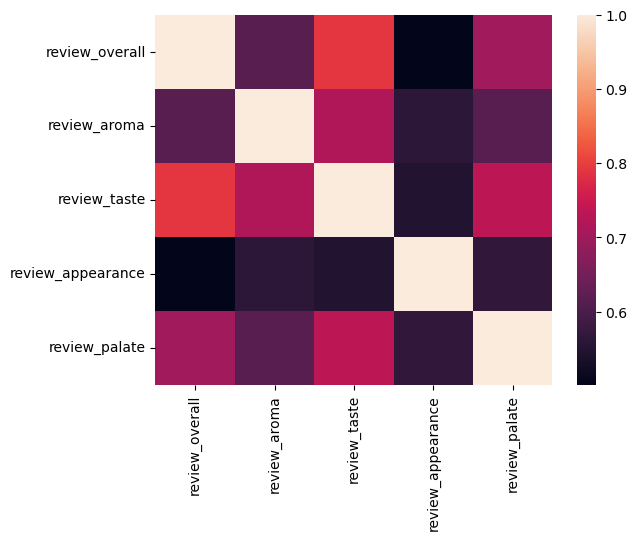

In [11]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [13]:
# Extract the correlation of each factor with the overall score
correlation_with_overall = corr['review_overall'].sort_values(ascending=False)

print("Correlation of different factors with overall beer quality:")
print(correlation_with_overall[1:])

Correlation of different factors with overall beer quality:
review_taste         0.789816
review_palate        0.701914
review_aroma         0.616013
review_appearance    0.501732
Name: review_overall, dtype: float64


#####  I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?

In [19]:
# Calculate the mean aroma and appearance ratings for each beer style
beerstyle1 = beer_df.groupby('beer_style').agg({'review_aroma': np.mean, 'review_appearance': np.mean})
beerstyle1 = pd.DataFrame(beerstyle1.reset_index())
beerstyle1.columns = ['beer_style', 'review_aroma_mean', 'review_appearance_mean']

# Calculate the maximum aroma and appearance ratings for each beer style
beerstyle2 = beer_df.groupby('beer_style').agg({'review_aroma': np.max, 'review_appearance': np.max})
beerstyle2 = pd.DataFrame(beerstyle2.reset_index())
beerstyle2.columns = ['beer_style', 'review_aroma_max', 'review_appearance_max']

# Count the number of aroma and appearance reviews for each beer style
beerstyle3 = beer_df.groupby('beer_style').agg({'review_aroma': np.size, 'review_appearance': np.size})
beerstyle3 = pd.DataFrame(beerstyle3.reset_index())
beerstyle3.columns = ['beer_style', 'review_aroma_count', 'review_appearance_count']

# Merge the three DataFrames into one
beerstyle = pd.merge(pd.merge(beerstyle2, beerstyle1, on='beer_style'), beerstyle3, on='beer_style')

/tmp/ipykernel_1643/947479812.py:2: FutureWarning: The provided callable <function mean at 0x7f9109307d80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  beerstyle1 = beer_df.groupby('beer_style').agg({'review_aroma': np.mean, 'review_appearance': np.mean})
/tmp/ipykernel_1643/947479812.py:2: FutureWarning: The provided callable <function mean at 0x7f9109307d80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  beerstyle1 = beer_df.groupby('beer_style').agg({'review_aroma': np.mean, 'review_appearance': np.mean})
/tmp/ipykernel_1643/947479812.py:7: FutureWarning: The provided callable <function max at 0x7f9109307380> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep cu

In [21]:
recommended = beerstyle.sort_values(['review_aroma_count','review_appearance_count','review_aroma_mean',
                                     'review_appearance_mean','review_aroma_max','review_appearance_max'], 
                                    ascending=[False, False,False, False, False, False])
top = recommended[:5]
top

beer_style  review_aroma_max  review_appearance_max  \
12                      American IPA               5.0                    5.0   
9     American Double / Imperial IPA               5.0                    5.0   
14           American Pale Ale (APA)               5.0                    5.0   
89            Russian Imperial Stout               5.0                    5.0   
11  American Double / Imperial Stout               5.0                    5.0   

    review_aroma_mean  review_appearance_mean  review_aroma_count  \
12           3.894103                3.968525              117586   
9            4.097782                4.078916               85977   
14           3.657746                3.781610               63469   
89           4.076576                4.210072               54129   
11           4.160665                4.163633               50705   

    review_appearance_count  
12                   117586  
9                     85977  
14                    63469  
89                    54129  
11                    50705